In [1]:
from itertools import chain
from dateutil.parser import parse
from datetime import datetime
import pandas as pd
import re
from matplotlib import pyplot as plt
import matplotlib as mpl
import numpy as np


to_namedtuple = lambda x: list(x.itertuples())
df = pd.read_csv('../data/all-history-actions.csv')
actions = to_namedtuple(df)
findBillNum = re.compile('([HS]\d{1,5})')



In [2]:
accompanied = re.compile("accompanied", re.IGNORECASE)
bill_num = re.compile("[HS]\d{1,5}", re.IGNORECASE)
referred_to_committee = re.compile("referred to the committee", re.IGNORECASE)
joint_ways_and_means = re.compile("committee on house ways and means", re.IGNORECASE)


In [3]:


result = df.loc[df['action'].apply(lambda x : joint_ways_and_means.match(x) != None)]

lines = result[['action', 'branch']]


for i, l in result[['action', 'branch']].iterrows(): 
  print(l)

In [4]:

for column in df: 
  if column.endswith("date"):
    df[column] = pd.to_datetime(df[column])

df['date'] = pd.DatetimeIndex(df['date']).date

# df[(~df['action'].apply((lambda x: re.compile("new draft", re.IGNORECASE).search(x) != None))) & (df['action'].apply(lambda x: re.compile("substitute", re.IGNORECASE).search(x) != None))]


In [5]:
# action patterns

from collections import namedtuple


ActionType = namedtuple('ActionType', ['action_type', 'pattern'])

amendments = ActionType('amendments', re.compile('(amendment)', re.IGNORECASE))
accompanied = ActionType('accompanied', re.compile('(accompanied).*', re.IGNORECASE))
amended = ActionType('amended', re.compile('(amended).*', re.IGNORECASE))
also_based_on = ActionType('also_based_on', re.compile('(also based on).*', re.IGNORECASE))
substituted = ActionType('substituted', re.compile('(substitute).*', re.IGNORECASE))
new_draft = ActionType('new_draft', re.compile('(new draft)', re.IGNORECASE))
text_of = ActionType('text_of', re.compile('(text of)', re.IGNORECASE))
to_committee = ActionType('to_committee', re.compile('(referred|discharged|recommitted)', re.IGNORECASE))
committee_of_conference = ActionType('committee_of_conference', re.compile('committee of (conference)', re.IGNORECASE))
reported = ActionType('reported', re.compile('(:P<reported>reported|ought)', re.IGNORECASE))
concurred = ActionType('concurred', re.compile('(.*concurred)', re.IGNORECASE))
hearing = ActionType('hearing', re.compile('(hearing)', re.IGNORECASE))
read = ActionType('read', re.compile('(read)', re.IGNORECASE))
enacted = ActionType('enacted', re.compile('(enacted)', re.IGNORECASE))
engrossed = ActionType('engrossed', re.compile('(engrossed)', re.IGNORECASE))
governor = ActionType('governor', re.compile('(governor)', re.IGNORECASE))
adopted = ActionType('adopted', re.compile('(adopted)', re.IGNORECASE))
orders_of_the_day = ActionType('orders_of_the_day', re.compile('(orders)', re.IGNORECASE))
date_extended = ActionType('date_extended', re.compile('(extended)', re.IGNORECASE))
passed = ActionType('passed', re.compile('(passed over veto)', re.IGNORECASE))
placed_on_file = ActionType('placed_on_file', re.compile('(placed on file)', re.IGNORECASE))
rules_suspended = ActionType('rules_suspended', re.compile('(rules) suspended', re.IGNORECASE))
emergency_preamble = ActionType('emergency_preamble', re.compile('(emergency)', re.IGNORECASE))
transmitted = ActionType('transmitted', re.compile('(transmitted)', re.IGNORECASE))

bill_mention = ActionType('bill_mention', re.compile('(.*)\s([HS]\d{1,4})', re.IGNORECASE))

action_types = [
  accompanied, 
  also_based_on,
  amended, 
  substituted, 
  enacted, 
  engrossed, 
  governor, 
  adopted, 
  date_extended, 
  transmitted, 
  amendments, 
  text_of,
  to_committee,
  committee_of_conference, 
  reported, 
  concurred, 
  hearing, 
  rules_suspended, 
  read, 
  orders_of_the_day, 
  emergency_preamble,
  bill_mention
  ]


def get_action_type(action): 
  for a in action_types: 
    t = a.pattern.search(action)
    if t: 
      return a.action_type


df['action_type'] = df['action'].apply(get_action_type)


In [6]:
# df.groupby(['id', 'date']).describe()

[]

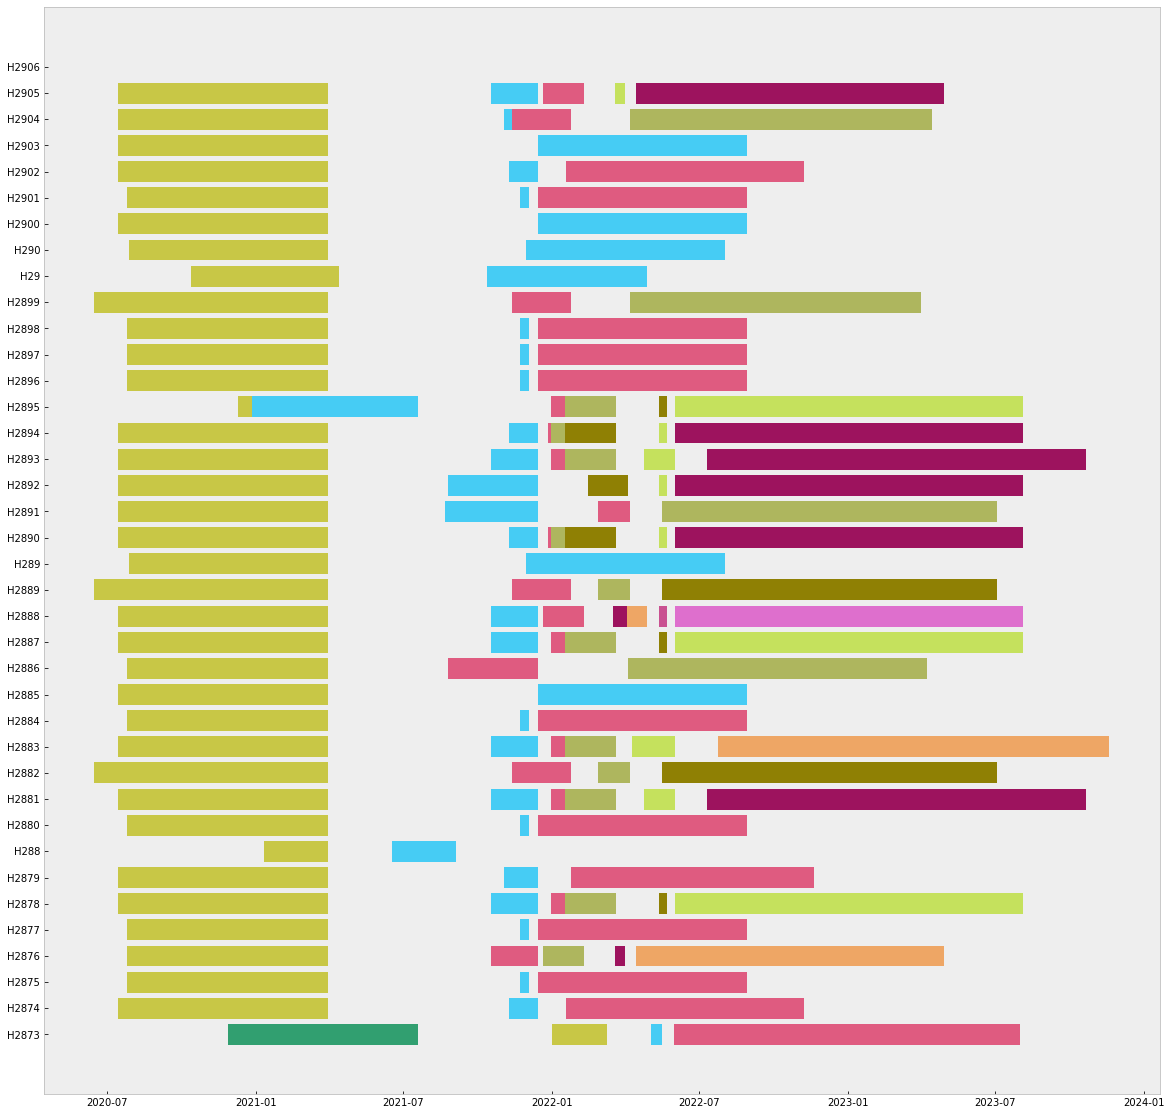

In [142]:

plt.style.use('bmh')
date_shifted = df.date.shift(-1)

df['duration'] = df.date - date_shifted

dft = df.iloc[10000:10200]

dftg = dft.groupby('id')

plt.figure(figsize=[20,20])

np.random.seed(1234)
value_array = np.random.rand(100, 3)

c=value_array



for index, d in enumerate(dftg.groups): 
  i = dftg.get_group(d)
  dates = i.date.to_list()
  durs = i.duration.to_list()
  labels = i.action_type.to_list()
  array = []
  for r in range(len(dates)): 
    array.append((dates[r], durs[r]))
  bb = plt.broken_barh(xranges=array, yrange=(index - .4, 0.8), facecolors=c)
  
  
plt.grid(False)
plt.yticks(np.arange(0, len(dftg.groups), step=1), labels=dftg.groups)


plt.plot()



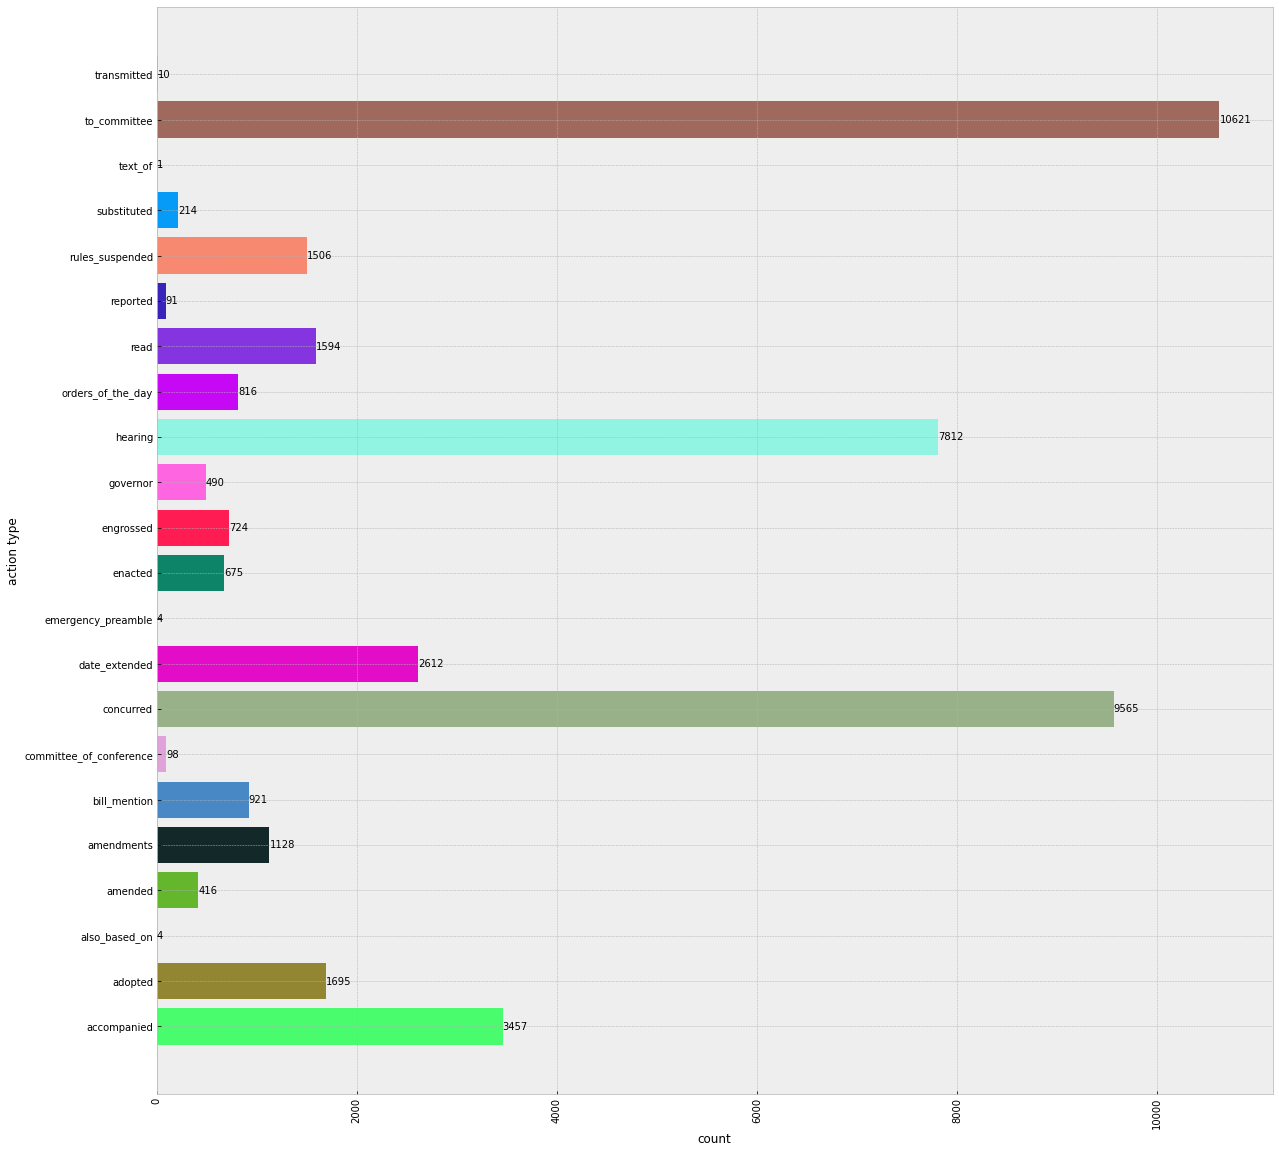

In [128]:


dg = df.groupby(['action_type']).count()

dg.sort_values(by='action_type')

c=np.random.rand(len(dg.index), 3)
bar_labels = dg.index



plt.style.use('bmh')
plt.figure(figsize=[20,20])
plt.xticks(rotation='vertical')
p1 = plt.barh(dg.index, dg.id, color=c)
plt.bar_label(p1)
plt.xlabel("count")
plt.ylabel("action type")
plt.show()
